## Document Denoising Using Autoencoder 

### 1. Loading Image from folder

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def load_images(directory):
    
    import glob
    from keras.preprocessing.image import img_to_array,load_img
    import numpy as np

    
    path = glob.glob(directory)
    
    array_shape = (len(path), 258, 540, 1)
    image_shape = (258, 540,1)
    
    image_list = np.zeros(array_shape)
    for i, fig in enumerate(path):
        img = load_img(fig, target_size=image_shape,color_mode='grayscale')
        x = img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [21]:
X_train_img = load_images('data/train/*.png')
y_train_img = load_images('data/train_cleaned/*.png')
X_test_img = load_images('data/test/*.png')

In [22]:
print(X_train_img.shape)
print(y_train_img.shape)
print(X_test_img.shape)

(144, 258, 540, 1)
(144, 258, 540, 1)
(72, 258, 540, 1)


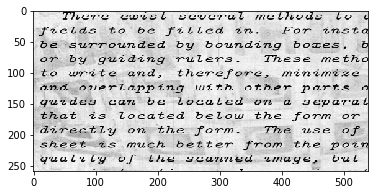

In [23]:
plt.imshow(X_train_img[20].reshape(258,540),cmap='gray')

                Document with Noise - Train Image (X_Train)

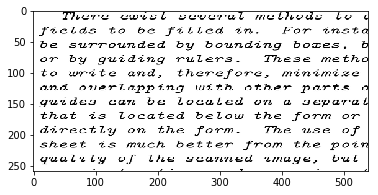

In [24]:
plt.imshow(y_train_img[20].reshape(258,540),cmap='gray')

                Document without Noise - Target Image (y_train)

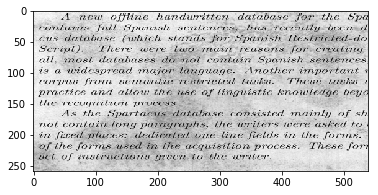

In [25]:
plt.imshow(X_test_img[20].reshape(258,540),cmap='gray')

### 2. Splitting the data into train,test and validation set

In [20]:
from sklearn.model_selection import train_test_split

In [34]:
X,y = X_train_img,y_train_img
X_test = X_test_img

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)


In [35]:
print("Training Set",X_train.shape[0])
print("Test Set",X_test.shape[0])
print("Validation Set",X_valid.shape[0])

Training Set 122
Test Set 72
Validation Set 22
